Exploración de Datos - Mr Fantasy

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Carga y examinación de datos

In [47]:
df = pd.read_csv('jugadores_fantasy_migate.csv')

In [48]:
print(df.isnull().sum())

Nombre                 0
Precio                 0
Media                  0
Total_puntos           0
posicion               0
equipo                 0
Partidos               0
Minutos                0
Goles                  0
Asistencias            0
Asistencias sin Gol    0
Centros                0
Despejes               0
Remates                0
Tiros                  0
Recuperaciones         0
Perdidas               0
Penaltis fallados      0
Goles en contra        0
Rojas                  0
Paradas                0
Penaltis cometidos     0
Amarillas              0
Seguna Amarilla        0
Penaltis provocados    0
Penaltis parados       0
Goles en PP            0
dtype: int64


In [49]:
print(df.head())
print(df.info())

          Nombre    Precio  Media  Total_puntos     posicion  \
0  J. Bellingham  24262000   10.2           173  mediocentro   
1        T. Kubo  20904000    8.2           147  mediocentro   
2   A. Griezmann  24384000    7.6           144    delantero   
3    I. Williams  18358000    7.7           139    delantero   
4     B. Mayoral  16992000    7.3           138    delantero   

                       equipo  Partidos  Minutos  Goles  Asistencias  ...  \
0  Real Madrid Club de Fútbol      13.0   1025.0   11.0          2.0  ...   
1     Real Sociedad de Fútbol      14.0    970.0    5.0          2.0  ...   
2     Club Atlético de Madrid      13.0   1071.0    9.0          1.0  ...   
3               Athletic Club      15.0   1233.0    6.0          3.0  ...   
4       Getafe Club de Fútbol      14.0   1170.0    0.0          0.0  ...   

   Penaltis fallados  Goles en contra  Rojas  Paradas  Penaltis cometidos  \
0                0.0              8.0    0.0      0.0                 0.0  

Limpieza y preparación de datos

In [50]:
df_cleaned = df.dropna()
print(df_cleaned.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Nombre               506 non-null    object 
 1   Precio               506 non-null    int64  
 2   Media                506 non-null    float64
 3   Total_puntos         506 non-null    int64  
 4   posicion             506 non-null    object 
 5   equipo               506 non-null    object 
 6   Partidos             506 non-null    float64
 7   Minutos              506 non-null    float64
 8   Goles                506 non-null    float64
 9   Asistencias          506 non-null    float64
 10  Asistencias sin Gol  506 non-null    float64
 11  Centros              506 non-null    float64
 12  Despejes             506 non-null    float64
 13  Remates              506 non-null    float64
 14  Tiros                506 non-null    float64
 15  Recuperaciones       506 non-null    flo

In [51]:
print("Columnas en el DataFrame:")
print(df_cleaned.columns)

Columnas en el DataFrame:
Index(['Nombre', 'Precio', 'Media', 'Total_puntos', 'posicion', 'equipo',
       'Partidos', 'Minutos', 'Goles', 'Asistencias', 'Asistencias sin Gol',
       'Centros', 'Despejes', 'Remates', 'Tiros', 'Recuperaciones', 'Perdidas',
       'Penaltis fallados', 'Goles en contra', 'Rojas', 'Paradas',
       'Penaltis cometidos', 'Amarillas', 'Seguna Amarilla',
       'Penaltis provocados', 'Penaltis parados', 'Goles en PP'],
      dtype='object')


Análisis estadistico descriptivo

In [52]:
print(df_cleaned.describe())

             Precio       Media  Total_puntos    Partidos      Minutos  \
count  5.060000e+02  506.000000    506.000000  506.000000   506.000000   
mean   4.039215e+06    3.313241     44.391304    8.992095   481.134387   
std    5.300611e+06    1.710782     33.437352    5.619621   425.021082   
min    1.600000e+05   -0.600000     -3.000000    0.000000     0.000000   
25%    1.892500e+05    2.300000     15.000000    1.500000     0.000000   
50%    1.174500e+06    3.300000     41.500000   12.000000   420.000000   
75%    6.532250e+06    4.400000     67.000000   14.000000   834.500000   
max    2.438400e+07   11.000000    173.000000   15.000000  1260.000000   

            Goles  Asistencias  Asistencias sin Gol     Centros    Despejes  \
count  506.000000   506.000000           506.000000  506.000000  506.000000   
mean     0.794466     0.577075             0.913043    3.500000    8.666008   
std      1.543190     1.084083             1.524827    7.437462   12.488454   
min      0.000000

Correlaciones

In [53]:
df_cleaned_numeric = df_cleaned.select_dtypes(include=[np.number])

In [54]:
correlaciones = df_cleaned_numeric.corr()

Visualización de datos

Distribución de variables numéricas clave

<Figure size 1500x1000 with 0 Axes>

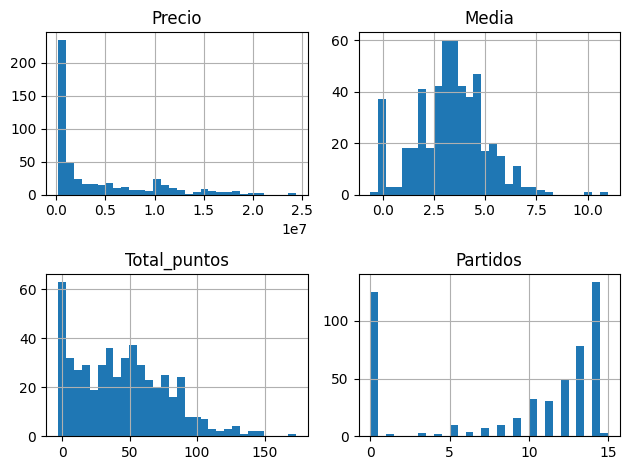

In [55]:
plt.figure(figsize=(15, 10))
df_cleaned[['Precio', 'Media', 'Total_puntos', 'Partidos']].hist(bins=30)
plt.tight_layout()
plt.savefig('distribucion_variables_clave.png')
plt.show()

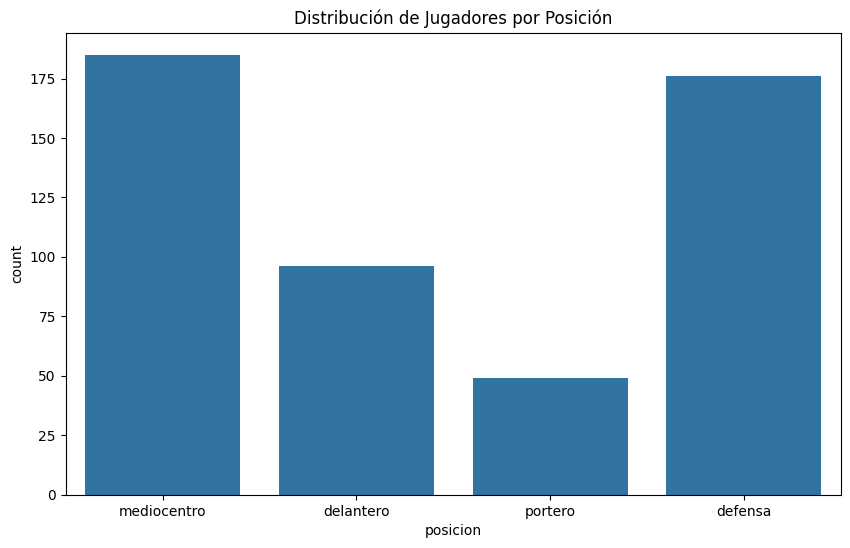

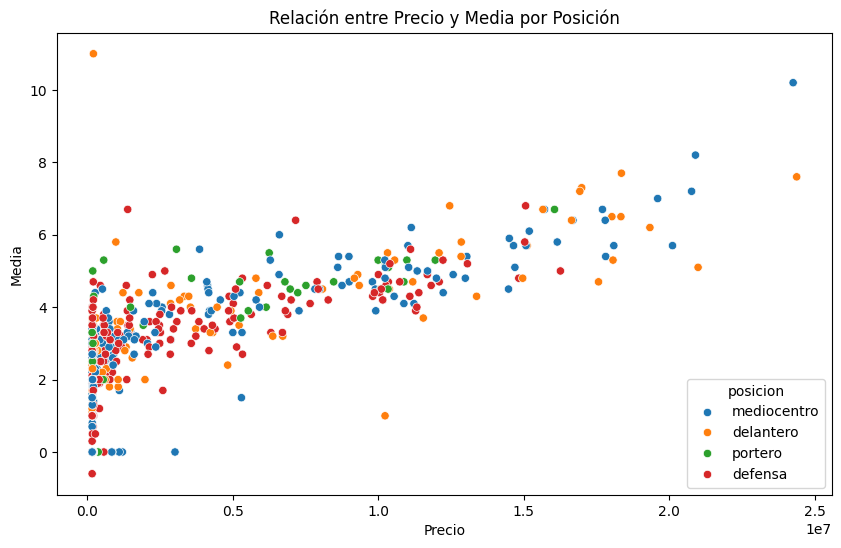

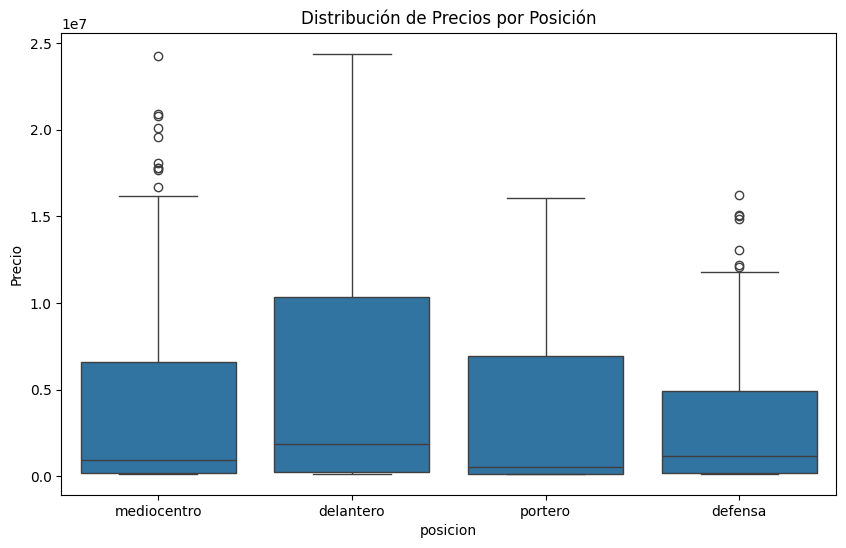

In [56]:
if 'posicion' in df_cleaned.columns:
    # Gráfico de barras para posiciones
    plt.figure(figsize=(10, 6))
    sns.countplot(x='posicion', data=df_cleaned)
    plt.title('Distribución de Jugadores por Posición')
    plt.savefig('distribucion_posiciones.png')
    plt.show()

    # Relación entre Precio y Media
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='Precio', y='Media', data=df_cleaned, hue='posicion')
    plt.title('Relación entre Precio y Media por Posición')
    plt.savefig('precio_vs_media.png')
    plt.show()

    # Boxplot de Precio por Posición
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='posicion', y='Precio', data=df_cleaned)
    plt.title('Distribución de Precios por Posición')
    plt.savefig('precios_por_posicion.png')
    plt.show()
else:
    print("La columna 'posicion' no está presente en el DataFrame.")

Gráfico de barras para posiciones

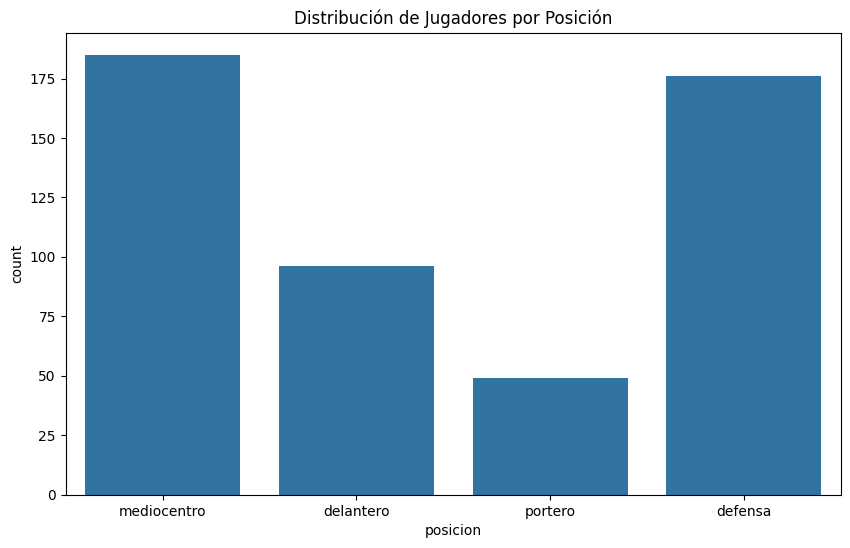

In [57]:
plt.figure(figsize=(10, 6))
sns.countplot(x='posicion', data=df_cleaned)
plt.title('Distribución de Jugadores por Posición')
plt.savefig('distribucion_posiciones.png')
plt.show()

Relación entre Precio y Media

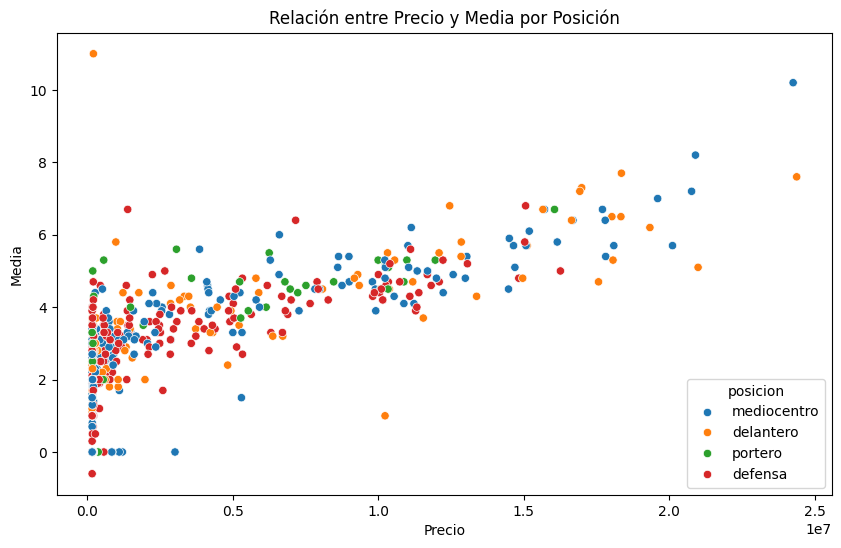

In [58]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Precio', y='Media', data=df_cleaned, hue='posicion')
plt.title('Relación entre Precio y Media por Posición')
plt.savefig('precio_vs_media.png')
plt.show()

Boxplot de Precio por Posición

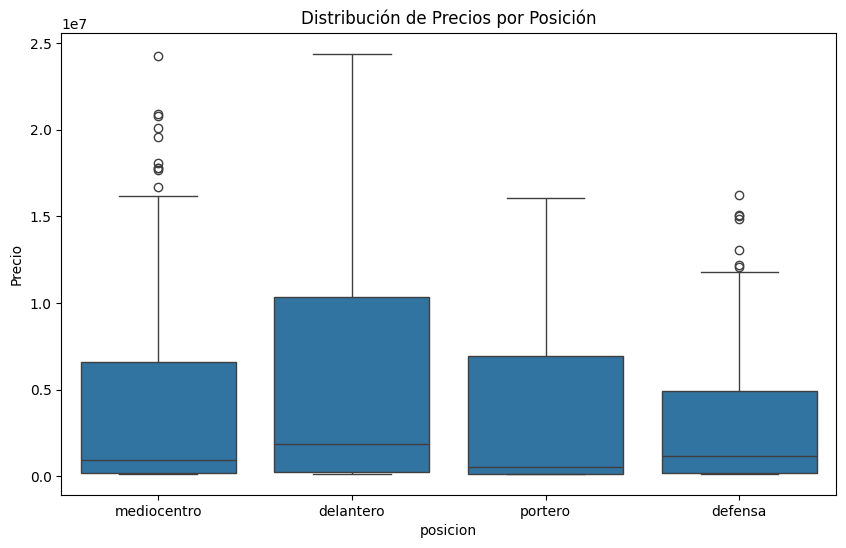

In [59]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='posicion', y='Precio', data=df_cleaned)
plt.title('Distribución de Precios por Posición')
plt.savefig('precios_por_posicion.png')
plt.show()

Análisis bivariado

Mapa de calor de correlaciones

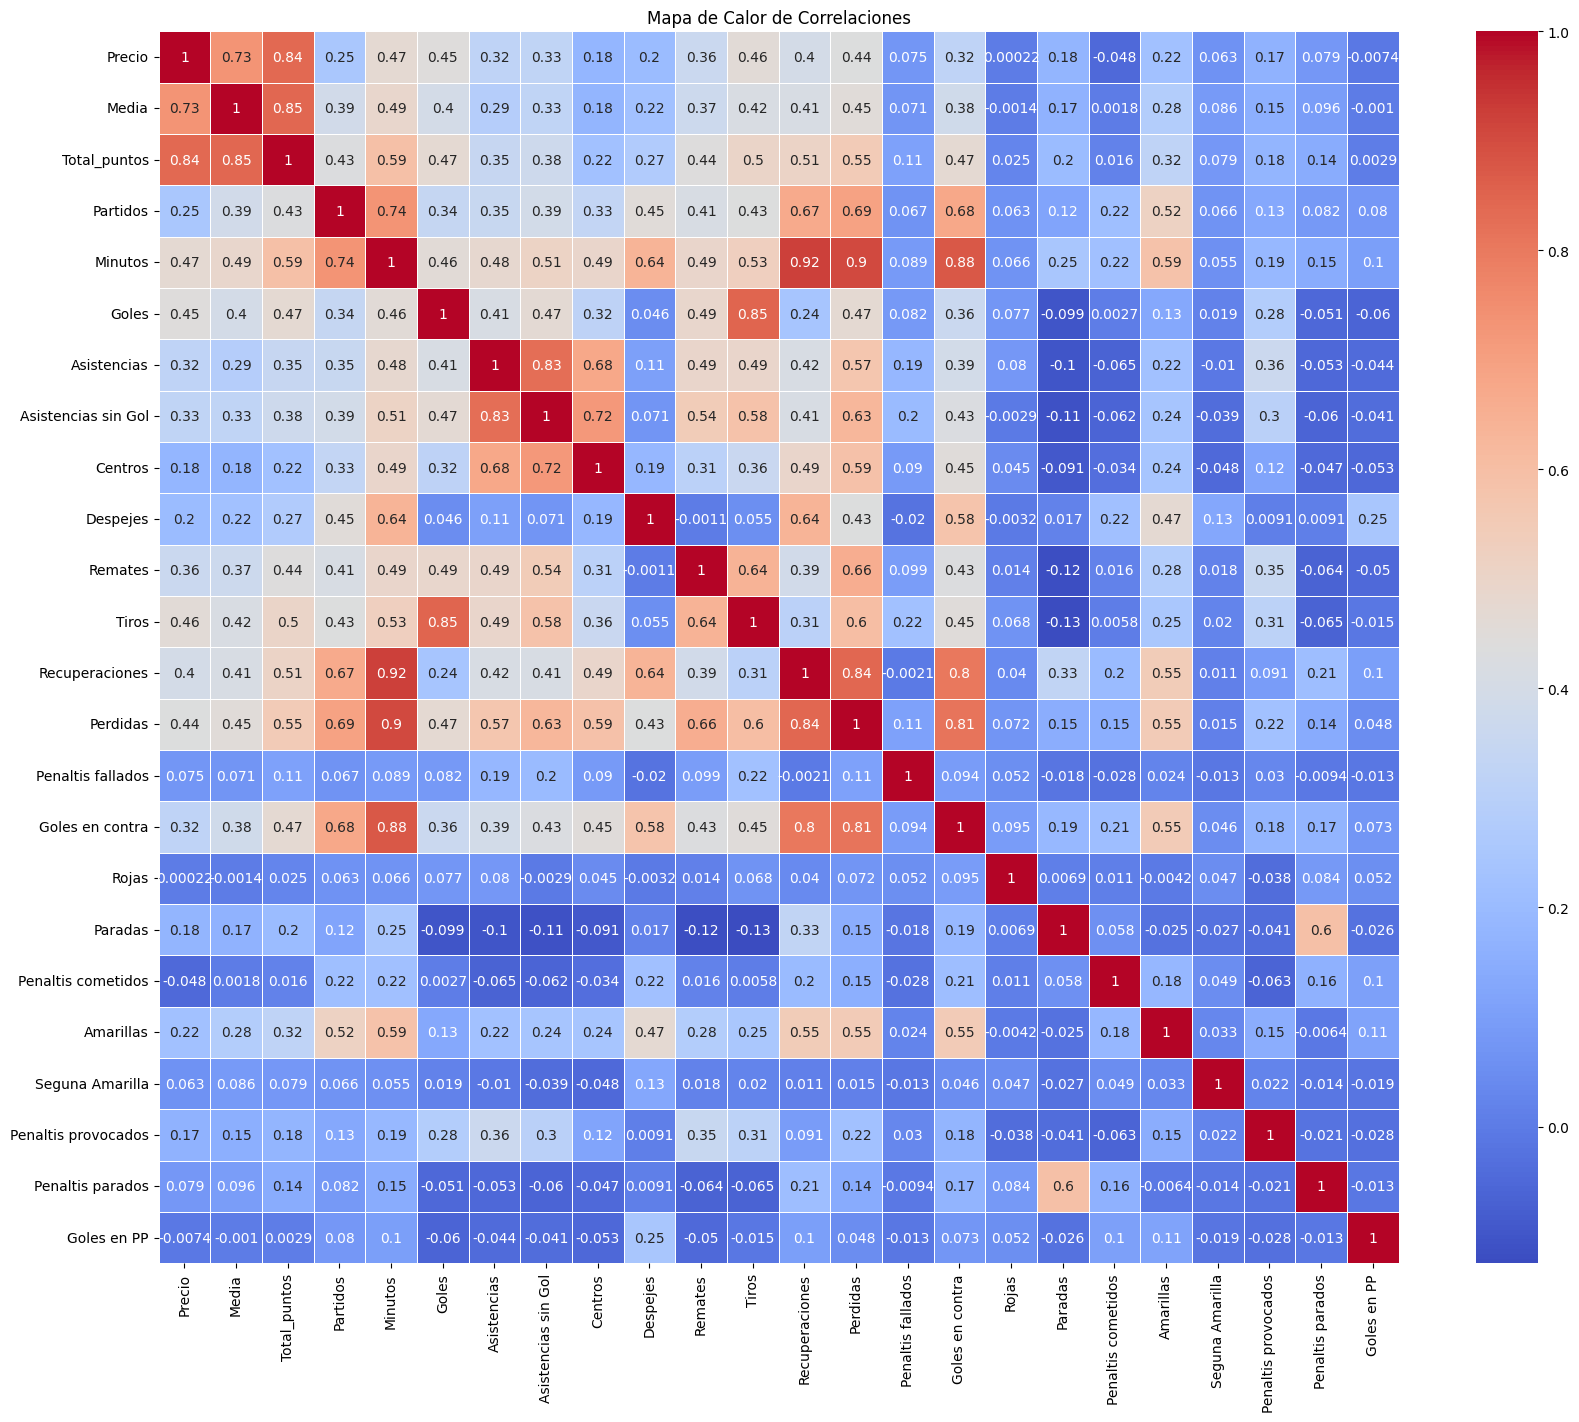

In [60]:
plt.figure(figsize=(20, 16))
sns.heatmap(correlaciones, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Mapa de Calor de Correlaciones')
plt.savefig('mapa_calor_correlaciones.png')
plt.show()

Scatter plot matriz para variables clave

In [61]:
variables_clave = ['Precio', 'Media', 'Total_puntos']
if 'Goles' in df_cleaned.columns:
    variables_clave.append('Goles')
if 'Asistencias' in df_cleaned.columns:
    variables_clave.append('Asistencias')
if 'Partidos' in df_cleaned.columns:
    variables_clave.append('Partidos')

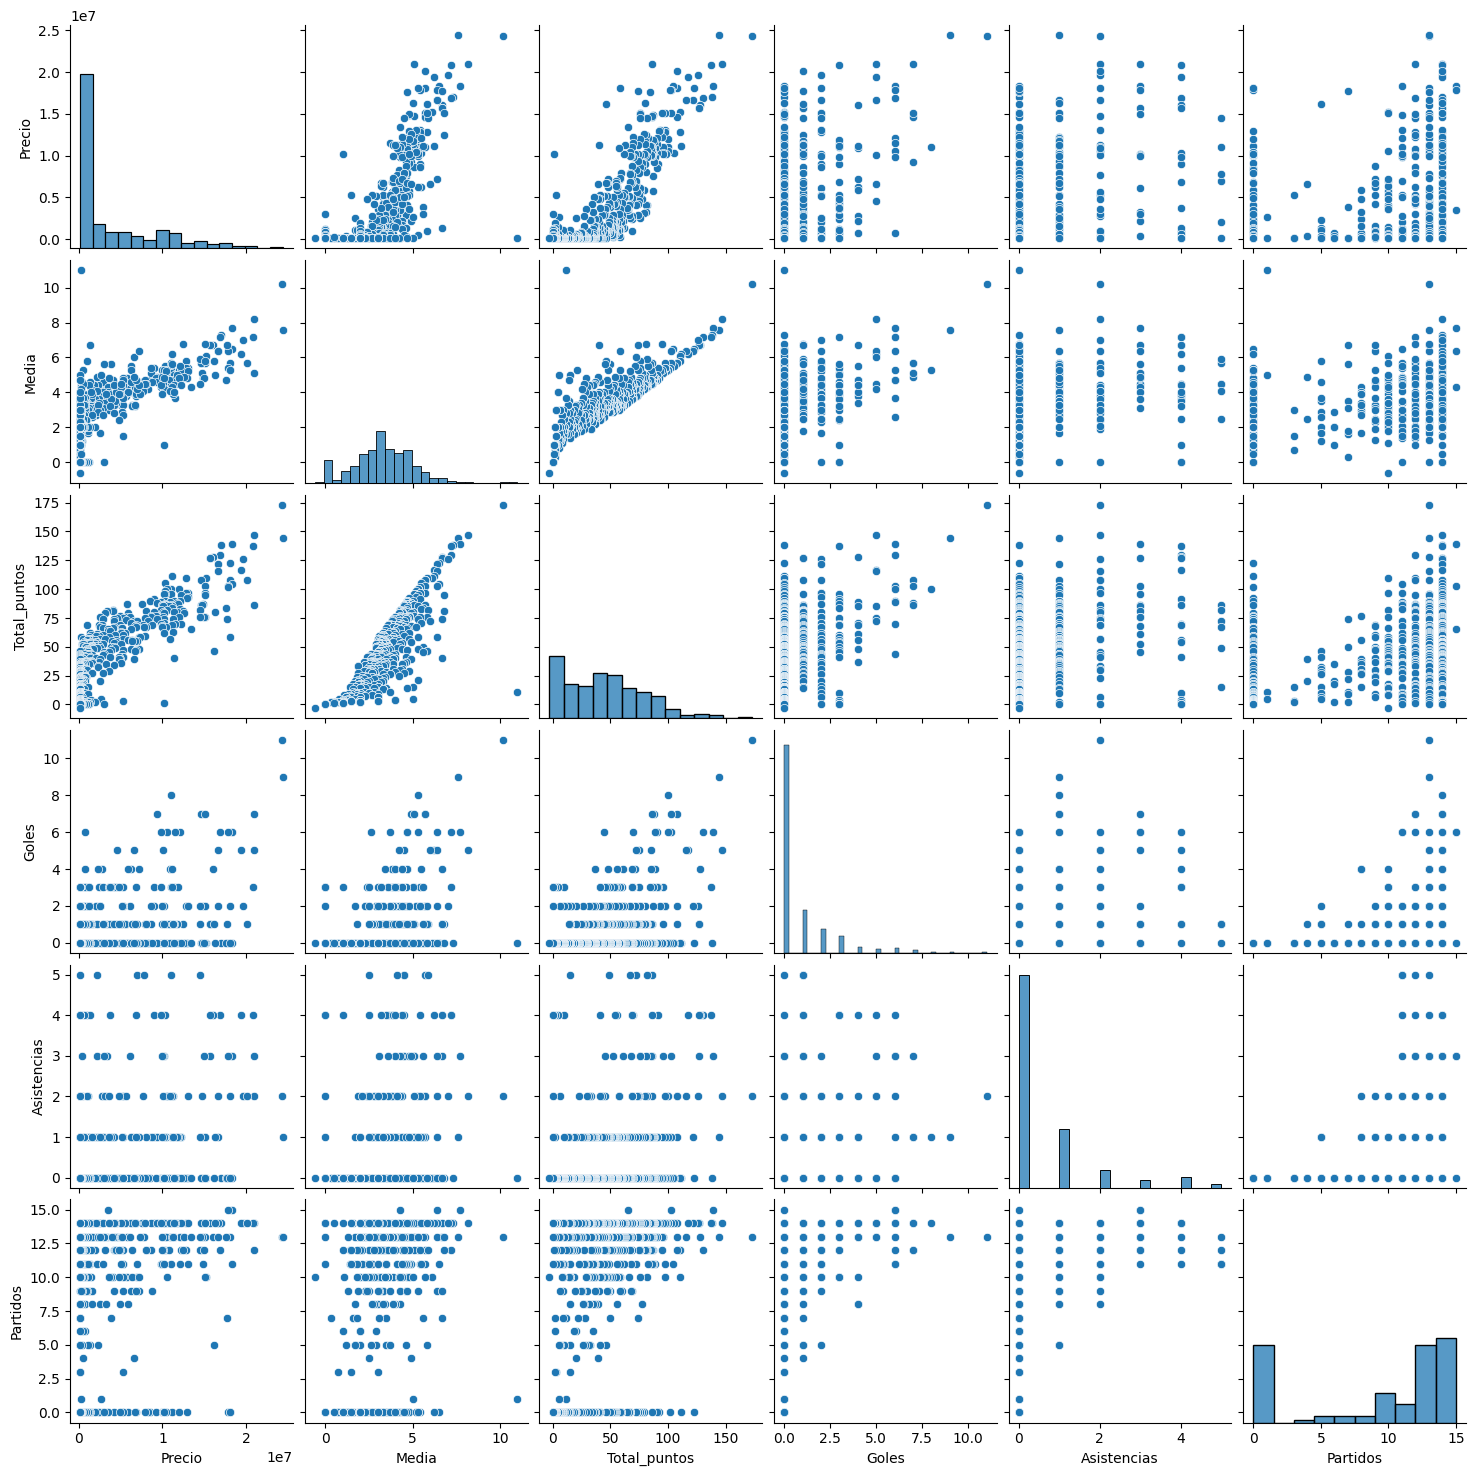

In [62]:
sns.pairplot(df_cleaned[variables_clave])
plt.savefig('scatter_plot_matriz.png')
plt.show()

Identificación de jugadores TOP

Top 10 jugadores por Total_puntos

In [63]:
top_10_puntos = df_cleaned.nlargest(10, 'Total_puntos')[['Nombre', 'Total_puntos', 'Precio']]
if 'posicion' in df_cleaned.columns:
    top_10_puntos['posicion'] = df_cleaned.nlargest(10, 'Total_puntos')['posicion']
print("Top 10 Jugadores por Total de Puntos:")
print(top_10_puntos)

Top 10 Jugadores por Total de Puntos:
          Nombre  Total_puntos    Precio     posicion
0  J. Bellingham           173  24262000  mediocentro
1        T. Kubo           147  20904000  mediocentro
2   A. Griezmann           144  24384000    delantero
3    I. Williams           139  18358000    delantero
4     B. Mayoral           138  16992000    delantero
5      A. García           137  20771000  mediocentro
6      A. Dovbyk           130  16928000    delantero
7      Á. Valles           128  16058000      portero
8         Pepelu           127  15714000  mediocentro
9     A. Budimir           127  15660000    delantero


Top 10 jugadores por Media

In [64]:
top_10_media = df_cleaned.nlargest(10, 'Media')[['Nombre', 'Media', 'Precio']]
if 'posicion' in df_cleaned.columns:
    top_10_media['posicion'] = df_cleaned.nlargest(10, 'Media')['posicion']
print("\nTop 10 Jugadores por Media:")
print(top_10_media)


Top 10 Jugadores por Media:
            Nombre  Media    Precio     posicion
394        M. Guiu   11.0    204000    delantero
0    J. Bellingham   10.2  24262000  mediocentro
1          T. Kubo    8.2  20904000  mediocentro
3      I. Williams    7.7  18358000    delantero
2     A. Griezmann    7.6  24384000    delantero
4       B. Mayoral    7.3  16992000    delantero
5        A. García    7.2  20771000  mediocentro
6        A. Dovbyk    7.2  16928000    delantero
10            Isco    7.0  19605000  mediocentro
36     D. Carvajal    6.8  15064000      defensa


Análisis adicional

Relación entre Minutos jugados y Total_puntos

In [65]:
if 'Minutos' in df_cleaned.columns and 'Total_puntos' in df_cleaned.columns:
    # Relación entre Minutos jugados y Total_puntos
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='Minutos', y='Total_puntos', data=df_cleaned)
    plt.title('Relación entre Minutos Jugados y Total de Puntos')
    plt.savefig('minutos_vs_total_puntos.png')
    plt.close()

Distribución de Goles por Posición

In [66]:
if 'Goles' in df_cleaned.columns and 'posicion' in df_cleaned.columns:
    # Distribución de Goles por Posición
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='posicion', y='Goles', data=df_cleaned)
    plt.title('Distribución de Goles por Posición')
    plt.savefig('goles_por_posicion.png')
    plt.close()

Resumen de hallazgos

In [67]:
print("\nResumen de Hallazgos:\n")
print("1. Las variables numéricas clave muestran las siguientes distribuciones:")
for col in ['Precio', 'Media', 'Total_puntos']:
    if col in df_cleaned.columns:
        print(f"   - {col}: Media = {df_cleaned[col].mean():.2f}, Mediana = {df_cleaned[col].median():.2f}")
        print(f"     Asimetría = {df_cleaned[col].skew():.2f}")
print("\n2. Correlaciones importantes:")
correlaciones_importantes = [
    ('Precio', 'Total_puntos'),
    ('Media', 'Total_puntos'),
    ('Precio', 'Media')
]
for var1, var2 in correlaciones_importantes:
    if var1 in correlaciones.index and var2 in correlaciones.columns:
        corr = correlaciones.loc[var1, var2]
        print(f"   - Correlación entre {var1} y {var2}: {corr:.2f}")
print("\n3. Los jugadores con mejor rendimiento:")
if not top_10_puntos.empty:
    print(f"   - Precio promedio de los 10 mejores por Total_puntos: {top_10_puntos['Precio'].mean():.2f}")
    if 'posicion' in top_10_puntos.columns:
        posicion_comun = top_10_puntos['posicion'].mode().values[0]
        print(f"   - Posición más común entre los 10 mejores: {posicion_comun}")
print("\n4. Factores clave para predecir altas puntuaciones incluyen:")
factores_clave = ['Precio', 'Media', 'Partidos', 'Goles', 'Asistencias', 'Minutos']
for factor in factores_clave:
    if factor in correlaciones.index and 'Total_puntos' in correlaciones.columns:
        corr = correlaciones.loc[factor, 'Total_puntos']
        print(f"   - {factor}: Correlación con Total_puntos = {corr:.2f}")



Resumen de Hallazgos:

1. Las variables numéricas clave muestran las siguientes distribuciones:
   - Precio: Media = 4039215.42, Mediana = 1174500.00
     Asimetría = 1.46
   - Media: Media = 3.31, Mediana = 3.30
     Asimetría = 0.20
   - Total_puntos: Media = 44.39, Mediana = 41.50
     Asimetría = 0.59

2. Correlaciones importantes:
   - Correlación entre Precio y Total_puntos: 0.84
   - Correlación entre Media y Total_puntos: 0.85
   - Correlación entre Precio y Media: 0.73

3. Los jugadores con mejor rendimiento:
   - Precio promedio de los 10 mejores por Total_puntos: 19003100.00
   - Posición más común entre los 10 mejores: delantero

4. Factores clave para predecir altas puntuaciones incluyen:
   - Precio: Correlación con Total_puntos = 0.84
   - Media: Correlación con Total_puntos = 0.85
   - Partidos: Correlación con Total_puntos = 0.43
   - Goles: Correlación con Total_puntos = 0.47
   - Asistencias: Correlación con Total_puntos = 0.35
   - Minutos: Correlación con Total_pu

Observaciones adicionales

In [68]:
print("\n5. Observaciones adicionales:")
if 'posicion' in df_cleaned.columns:
    posicion_mas_cara = df_cleaned.groupby('posicion')['Precio'].mean().idxmax()
    print(f"   - La posición con el precio promedio más alto es: {posicion_mas_cara}")

if 'Goles' in df_cleaned.columns and 'posicion' in df_cleaned.columns:
    max_goles_pos = df_cleaned.groupby('posicion')['Goles'].mean().idxmax()
    print(f"   - La posición que marca más goles en promedio es: {max_goles_pos}")

print("\nEstos hallazgos sugieren estrategias para seleccionar jugadores con alto potencial de puntuación en el juego de fantasy.")


5. Observaciones adicionales:
   - La posición con el precio promedio más alto es: delantero
   - La posición que marca más goles en promedio es: delantero

Estos hallazgos sugieren estrategias para seleccionar jugadores con alto potencial de puntuación en el juego de fantasy.
